In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture


In [14]:
df = pd.read_csv('3.csv')
print (df.columns)

Index(['Unnamed: 0', 'sex', 'weight', 'height', 'repwt', 'repht'], dtype='object')


In [15]:
train, test = train_test_split(
    df, 
    train_size=100, 
    test_size=100, 
    stratify=df['sex'],
    random_state=42
)

In [16]:
def remove_outliers(df):
    df = df[(df['height'] >= 140) & (df['height'] <= 220)]
    df = df[(df['weight'] >= 40) & (df['weight'] <= 150)]
    return df

train_clean = remove_outliers(train)
test_clean = remove_outliers(test)

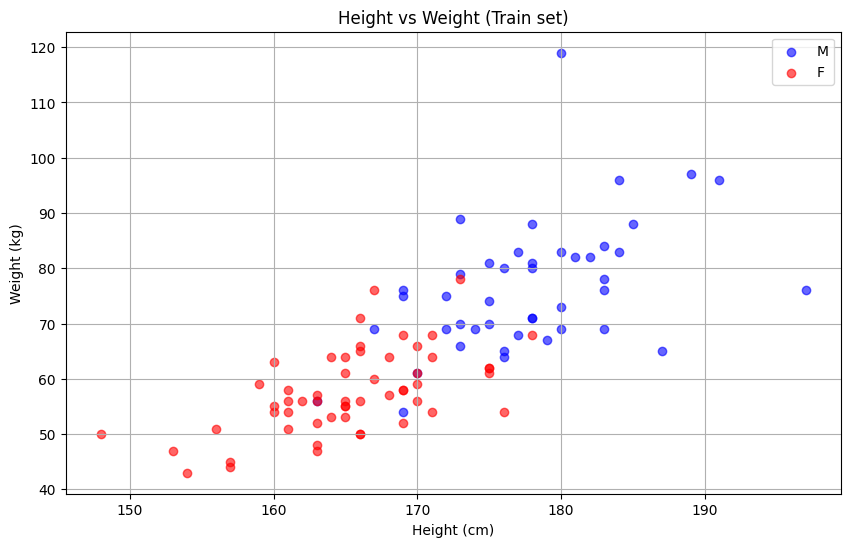

In [17]:
# в) Визуализация train-выборки
plt.figure(figsize=(10, 6))

# Разделяем точки по полу для разного цвета
male_data = train_clean[train_clean['sex'] == 'M']
female_data = train_clean[train_clean['sex'] == 'F']

plt.scatter(male_data['height'], male_data['weight'], color='blue', label='M', alpha=0.6)
plt.scatter(female_data['height'], female_data['weight'], color='red', label='F', alpha=0.6)

plt.title('Height vs Weight (Train set)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.legend()
plt.show()

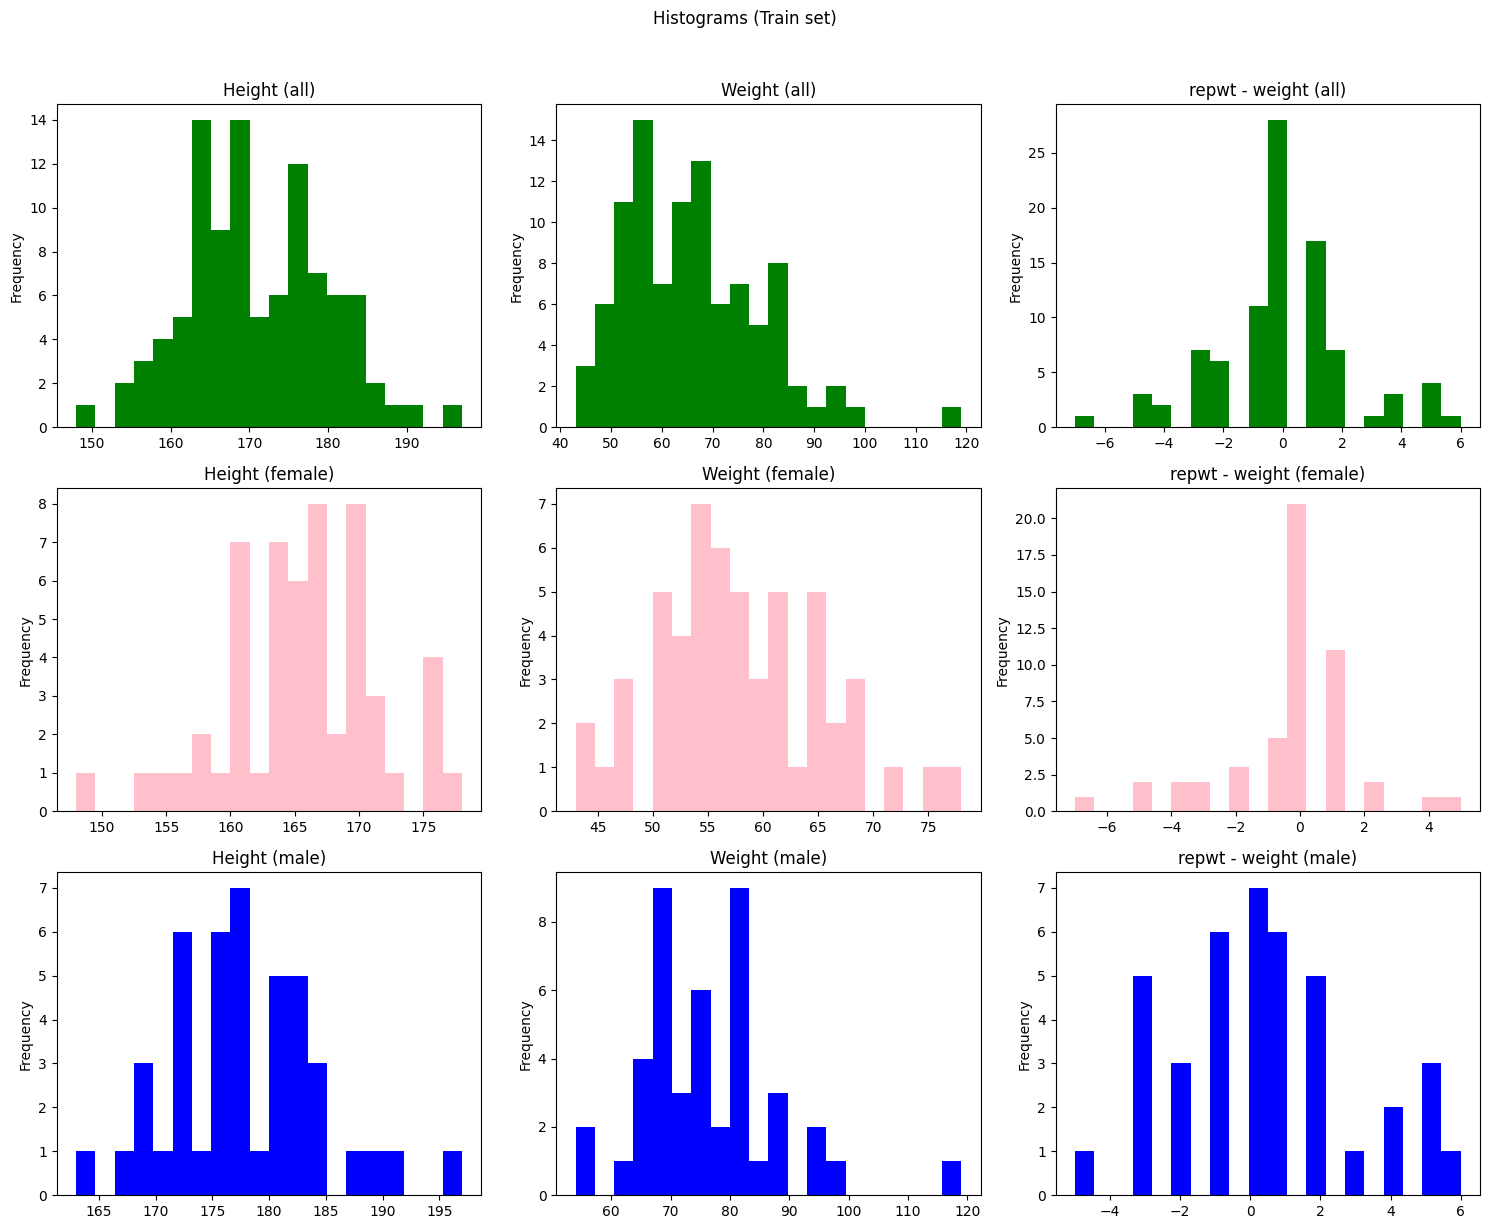

In [18]:
# г) Построение гистограмм
def plot_histograms(df, title_suffix=""):
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    fig.suptitle(f'Histograms {title_suffix}', y=1.02)
    
    # Общие гистограммы
    df['height'].plot.hist(ax=axes[0, 0], title='Height (all)', bins=20, color='green')
    df['weight'].plot.hist(ax=axes[0, 1], title='Weight (all)', bins=20, color='green')
    (df['repwt'] - df['weight']).plot.hist(ax=axes[0, 2], title='repwt - weight (all)', bins=20, color='green')
    
    # Только женщины
    female = df[df['sex'] == 'F']
    female['height'].plot.hist(ax=axes[1, 0], title='Height (female)', bins=20, color='pink')
    female['weight'].plot.hist(ax=axes[1, 1], title='Weight (female)', bins=20, color='pink')
    (female['repwt'] - female['weight']).plot.hist(ax=axes[1, 2], title='repwt - weight (female)', bins=20, color='pink')
    
    # Только мужчины
    male = df[df['sex'] == 'M']
    male['height'].plot.hist(ax=axes[2, 0], title='Height (male)', bins=20, color='blue')
    male['weight'].plot.hist(ax=axes[2, 1], title='Weight (male)', bins=20, color='blue')
    (male['repwt'] - male['weight']).plot.hist(ax=axes[2, 2], title='repwt - weight (male)', bins=20, color='blue')
    
    plt.tight_layout()
    plt.show()

plot_histograms(train_clean, "(Train set)")